# Factors Influencing H1N1 Vaccine Uptake: A Predictive Analysis 

## Business Understanding

Vaccines stimulate the immune system to protect against specific diseases by containing parts of pathogens. Flu vaccines, including seasonal and H1N1 vaccines, help prevent the spread of influenza. Seasonal vaccines are updated yearly, while the H1N1 vaccine was developed after the 2009 pandemic. Vaccination protects individuals and promotes herd immunity, but challenges such as vaccine hesitancy, misinformation, and limited access can hinder widespread uptake.This project aims to predict factors influencing H1N1 vaccine uptake using data from the National 2009 H1N1 Flu Survey. The primary stakeholders are public health officials and policymakers, who will use the insights to design targeted vaccination strategies and improve future public health campaigns. The project will focus on predicting vaccine uptake based on demographic, behavioral, and health-related factors, and will not address issues related to vaccine distribution, policy, or effectiveness. The data source includes demographic information, health behaviors, and vaccination history. The project will be completed within a week, with the goal of providing actionable insights for improving public health outcomes. Clear alignment with stakeholders is essential to ensure the project meets their expectations.

## Data Understanding

The data for this project comes from three datasets: training_set_features.csv, test_set_features.csv, and training_set_labels.csv. The target variables are whether individuals received the H1N1 vaccine or the seasonal flu vaccine, while the predictors include demographic, health-related, and behavioral features such as age, income, health concerns, and vaccination recommendations. The data includes both categorical (e.g., age group, marital status) and numerical (e.g., household size, income) variables, with some binary and ordinal features. The datasets' size and distribution will be examined during exploration, and if necessary, resampling techniques may be applied to address imbalances. The data is collected via surveys, but it may contain biases or missing values, which will require cleaning and preprocessing before building the model.

## Data Preparation

Import the pandas library and load the CSV files into DataFrames for further inspection and analysis

In [1]:
#importing pandas as pd
import pandas as pd

#loading the  csv datasets into DataFrames
training_features_df = pd.read_csv("training_set_features.csv")
#Displaying the first few rows
training_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [2]:
#loading the  csv datasets into DataFrames
test_features_df = pd.read_csv("test_set_features.csv")
#Displaying the first few rows
test_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [3]:
#loading the  csv datasets into DataFrames
training_labels_df = pd.read_csv("training_set_labels.csv")
#Displaying the first few rows
training_labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


### Detecting and Handling Missing Values

First check if the datasets contain missing values

In [4]:
#checking for missing values in the training_features_df
missing_values = training_features_df.isnull().sum()
print(missing_values)
#check the shape of the dataframe
training_features_df.shape

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

(26707, 36)

From the findings above we can see that some columns have relatively small numbers of missing values, such as h1n1_concern (92 missing) and behavioral_face_mask (19 missing).

However, certain columns have a very large number of missing values, like doctor_recc_h1n1, doctor_recc_seasonal, health_insurance, and others related to employment (employment_industry, employment_occupation), which have thousands of missing entries.

The dataset has 26,707 rows and 36 columns

Next get a concise summary of the DataFrame

In [5]:
# Display summary of the DataFrame
training_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

***Consider Dropping Rows or Columns***

For columns have an excessive amount of missing data such as employment_occupation or employment_industry drop them entirely

In [6]:
# Drop columns with too many missing values (if needed)
training_features_df.drop(columns=['employment_industry', 'employment_occupation'], inplace=True)


***Impute Missing Numerical Data***

Imputing missing numerical values with either mean or median 

Use SimpleImputer from sklearn to fill missing numerical values.

In [7]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns with the median
numerical_cols = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 
                  'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 
                  'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 
                  'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 
                  'child_under_6_months', 'health_worker', 'health_insurance', 
                  'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 
                  'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 
                  'household_adults', 'household_children']

imputer = SimpleImputer(strategy='median')  # Use 'mean' or 'median' depending on the data
training_features_df[numerical_cols] = imputer.fit_transform(training_features_df[numerical_cols])


***Impute Missing Categorical Data***

You can impute missing values with the most frequent category (mode) or use a placeholder value like 'Unknown'



In [8]:
# Impute missing values for categorical columns with the mode (most frequent value)
categorical_cols = ['education', 'income_poverty', 'marital_status', 'rent_or_own', 
                    'employment_status']

imputer = SimpleImputer(strategy='most_frequent')  # Or use 'constant' with value='Unknown'
training_features_df[categorical_cols] = imputer.fit_transform(training_features_df[categorical_cols])


In [9]:
# Verify there are no remaining missing values
print(training_features_df.isnull().sum().sum())

0


In [10]:
#checking for missing values in the test_features_df
missing_values2 = test_features_df.isnull().sum()
print(missing_values2)
#check the shape of the dataframe
test_features_df.shape

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

(26708, 36)

From the findings above we can see that some columns have relatively small numbers of missing values, such as h1n1_concern (85 missing) and behavioral_face_mask (19 missing).

However, certain columns have a very large number of missing values, like doctor_recc_h1n1, doctor_recc_seasonal, health_insurance, and others related to employment (employment_industry, employment_occupation), which have thousands of missing entries.

***Consider Dropping Rows or Columns***

For columns have an excessive amount of missing data such as employment_occupation or employment_industry drop them entire
🎯



In [11]:
# Drop columns with too many missing values (if needed)
test_features_df.drop(columns=['employment_industry', 'employment_occupation'], inplace=True)


***Numerical Columns:*** Use strategies such as the mean, median, or mode for imputation depending on the distribution of the data.

***Categorical Columns:*** Replace missing values with the mode or a placeholder value like "Unknown".

In [12]:
# Split columns into numerical and categorical
numerical_columns = test_features_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = test_features_df.select_dtypes(include=['object']).columns

# Create imputers
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers to respective columns
test_features_df[numerical_columns] = numerical_imputer.fit_transform(test_features_df[numerical_columns])
test_features_df[categorical_columns] = categorical_imputer.fit_transform(test_features_df[categorical_columns])

In [13]:
# Verify no missing values remain
print(test_features_df.isnull().sum().sum())

0


Finally let's also check for missing values in the training_labels_df

In [14]:
#checking for missing values in the training_labels_df
missing_values2 = training_labels_df.isnull().sum()
print(missing_values2)
#check the shape of the dataframe
training_labels_df.shape

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64


(26707, 3)

From the findings above we can see that the training_labels_df doesn't contain any missing values

### Checking for Duplicates: Ensuring Data Integrity

Duplicate records in a dataset can skew analysis and negatively impact model performance. By identifying and removing duplicates, we ensure the dataset's integrity and prevent redundancy from influencing the results. This step helps maintain the quality and reliability of the data used for analysis and modeling.

The next step lets check for duplicates in the datasets

In [15]:
# Check for duplicate rows
duplicate_rows = training_features_df[training_features_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)


Number of duplicate rows: 0
Empty DataFrame
Columns: [respondent_id, h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_h1n1, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, health_insurance, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children]
Index: []

[0 rows x 34 columns]


In [16]:
 #Check for duplicate rows
duplicate_rows = test_features_df[test_features_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [respondent_id, h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_h1n1, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, health_insurance, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children]
Index: []

[0 rows x 34 columns]


In [17]:
duplicate_rows = training_labels_df[training_labels_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [respondent_id, h1n1_vaccine, seasonal_vaccine]
Index: []


In [18]:
import pandas as pd

# Add a column to identify the dataset
training_features_df['dataset'] = 'training'
test_features_df['dataset'] = 'test'

# Merge the datasets
merged_df = pd.concat([training_features_df, test_features_df], ignore_index=True)

# Display basic information about the merged DataFrame
print(merged_df.info())

# Preview the merged DataFrame
print(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  float64
 1   h1n1_concern                 53415 non-null  float64
 2   h1n1_knowledge               53415 non-null  float64
 3   behavioral_antiviral_meds    53415 non-null  float64
 4   behavioral_avoidance         53415 non-null  float64
 5   behavioral_face_mask         53415 non-null  float64
 6   behavioral_wash_hands        53415 non-null  float64
 7   behavioral_large_gatherings  53415 non-null  float64
 8   behavioral_outside_home      53415 non-null  float64
 9   behavioral_touch_face        53415 non-null  float64
 10  doctor_recc_h1n1             53415 non-null  float64
 11  doctor_recc_seasonal         53415 non-null  float64
 12  chronic_med_condition        53415 non-null  float64
 13  child_under_6_mo

After checking for duplicates, we found none in the dataset. This indicates that the data is clean and free from redundancy, ensuring reliable and unbiased results in subsequent analysis and modeling steps.

## Data Visualizations

### Distribution of Target Variables

Purpose:Understand the balance of target variables (h1n1_vaccine and seasonal_vaccine).

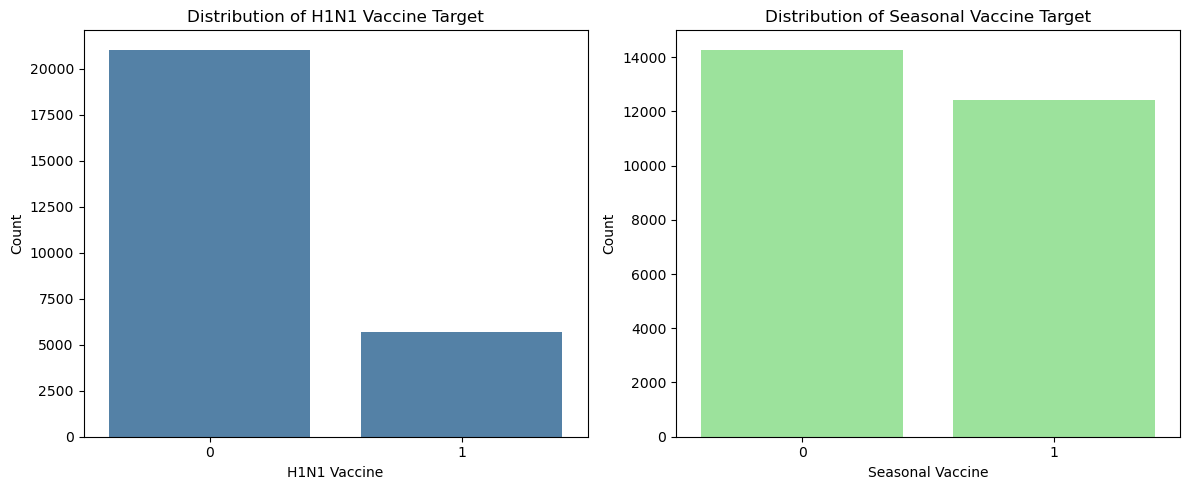

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of target variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for H1N1 vaccine
sns.countplot(x='h1n1_vaccine', data=training_labels_df, ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of H1N1 Vaccine Target')
axes[0].set_xlabel('H1N1 Vaccine')
axes[0].set_ylabel('Count')

# Plot for Seasonal vaccine
sns.countplot(x='seasonal_vaccine', data=training_labels_df, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Seasonal Vaccine Target')
axes[1].set_xlabel('Seasonal Vaccine')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

***H1N1 Vaccine Distribution:***

The majority of respondents (label 0) did not receive the H1N1 vaccine.
A smaller proportion of respondents (label 1) received the vaccine.
This indicates an imbalance in the target variable, as the number of people who did not take the H1N1 vaccine is significantly higher than those who did.

***Seasonal Vaccine Distribution:***

The distribution between those who did not receive the seasonal vaccine (label 0) and those who did (label 1) is more balanced compared to the H1N1 vaccine distribution.
There is still a slightly higher number of respondents who did not receive the seasonal vaccine, but the difference is less pronounced

###  Vaccine Uptake by Income Level

Purpose: Understand how income_poverty influences vaccine uptake.

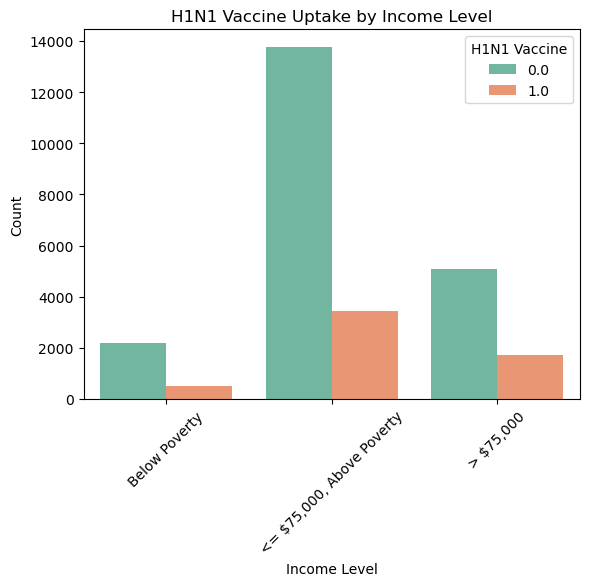

In [20]:
sns.countplot(data=merged_df, x='income_poverty', hue=training_labels_df['h1n1_vaccine'], palette='Set2')
plt.title('H1N1 Vaccine Uptake by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.legend(title='H1N1 Vaccine', loc='upper right')
plt.xticks(rotation=45)
plt.show()


<= $75,000, Above Poverty:This income category has the highest overall count of individuals.A significant majority in this group did not take the H1N1 vaccine (0.0).The number of individuals who took the vaccine (1.0) is comparatively lower.

Below Poverty:This group has the lowest total count of individuals.The uptake of the vaccine (1.0) is low but more proportionate to those who did not take it (0.0) compared to other income groups.

below > $75,000:This group has a smaller total count than the middle-income category.Similar to the other groups, a larger proportion of individuals did not take the vaccine (0.0), though the uptake (1.0) is slightly higher than in the lowest income group

The middle-income group (<= $75,000, Above Poverty) is the largest and shows the lowest vaccine uptake proportionally. This could indicate a need for targeted interventions in this demographic.Both the lowest and highest income groups show relatively lower H1N1 vaccine uptake, but the absolute count in the lowest income group is much smaller, suggesting additional barriers .


###  Vaccine Uptake by Education Level
Purpose: Assess the impact of education on vaccine uptake.


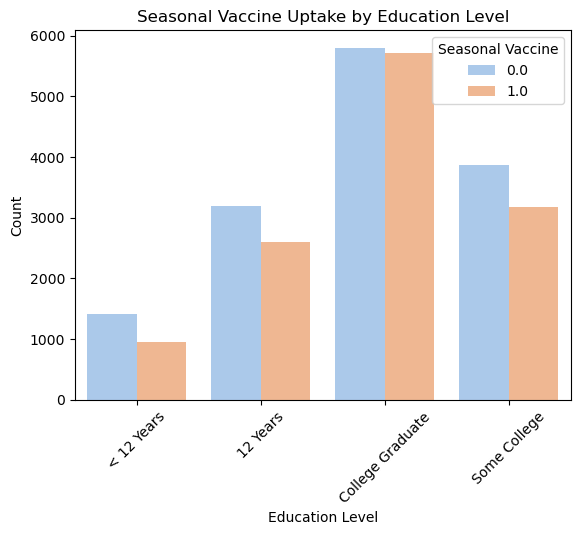

In [21]:
sns.countplot(data=merged_df, x='education', hue=training_labels_df['seasonal_vaccine'], palette='pastel')
plt.title('Seasonal Vaccine Uptake by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Seasonal Vaccine', loc='upper right')
plt.xticks(rotation=45)
plt.show()


College Graduates:This group has the highest count of individuals overall.A significant proportion of college graduates took the seasonal vaccine (1.0).

Education Levels Below College:As education levels decrease (e.g., <12 Years, 12 Years), the total count of individuals in these groups declines.The proportion of individuals taking the vaccine (1.0) is lower compared to those who did not (0.0).

Some College:This group has a balanced representation but still shows a higher count of individuals not taking the vaccine.

Higher education levels, particularly college graduates, are positively associated with seasonal vaccine uptake.
Individuals with lower education levels may have barriers to vaccine uptake, such as access, awareness, or beliefs. This could be an area for targeted public health campaigns.


### Geographic Region Analysis

Purpose: Visualize how vaccine uptake varies across hhs_geo_region.

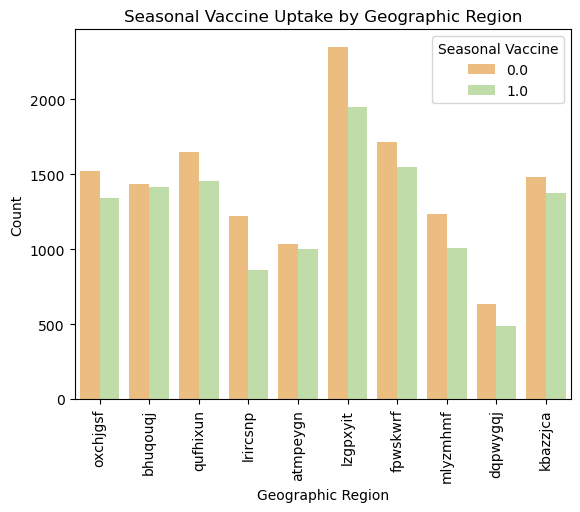

In [22]:
sns.countplot(data=merged_df, x='hhs_geo_region', hue=training_labels_df['seasonal_vaccine'], palette='Spectral')
plt.title('Seasonal Vaccine Uptake by Geographic Region')
plt.xlabel('Geographic Region')
plt.ylabel('Count')
plt.legend(title='Seasonal Vaccine', loc='upper right')
plt.xticks(rotation=90)
plt.show()


In most regions, the count of individuals who did not take the vaccine (orange bars) is higher than those who did (green bars).

The region "lzpxvyit" stands out with the highest number of individuals who did not take the vaccine (0.0) and also the highest uptake of the vaccine (1.0), indicating a large population in this region.

Regions like "fpwskwrf" and "mllyzmhmf" show lower vaccine uptake compared to other regions.

The counts for non-uptake (0.0) and uptake (1.0) appear to be more balanced in some regions, such as "bhugqouj" and "kbazzjca."

Overall, the chart suggests significant variation in seasonal flu vaccine uptake across geographic regions, with non-uptake generally outpacing uptake

### Age Group vs. Vaccination
Purpose:Analyze how vaccination uptake differs by age_group.

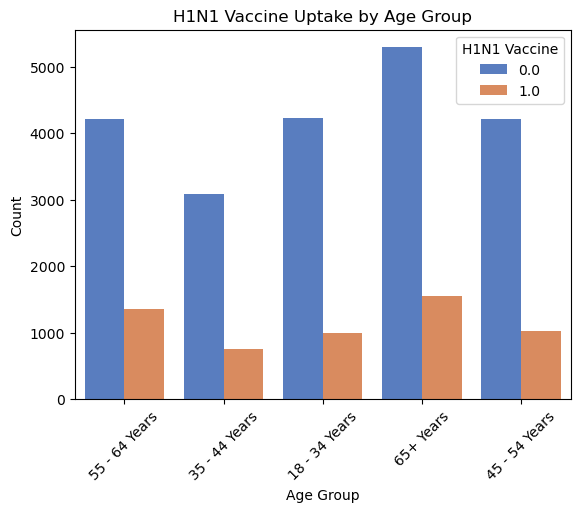

In [23]:
sns.countplot(data=merged_df, x='age_group', hue=training_labels_df['h1n1_vaccine'], palette='muted')
plt.title('H1N1 Vaccine Uptake by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='H1N1 Vaccine', loc='upper right')
plt.xticks(rotation=45)
plt.show()


For all age groups, the count of individuals who did not take the vaccine (blue bars) is significantly higher than those who did (orange bars).

The 65+ years age group has the highest number of individuals represented, both for vaccine uptake (1.0) and non-uptake (0.0).

The youngest age group (18–34 years) shows the lowest uptake of the vaccine (orange bar) relative to the others.
    
This chart suggests that vaccine uptake was generally low across all age groups, with older populations (especially 65+ years) having the highest representation overall.

### Feature Encoding

Convert categorical variables into a numeric format to make the data usable by machine learning algorithms. By applying techniques such as one-hot encoding or label encoding, we ensure that categorical variables are properly represented, enabling the model to process and learn from them effectively. 

In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Separate categorical and numerical features
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
                        'marital_status', 'rent_or_own', 'employment_status', 
                        'hhs_geo_region', 'census_msa']

numerical_features = [col for col in training_features_df.columns if training_features_df[col].dtype in ['int64', 'float64']]
numerical_features.remove('respondent_id')  # Remove `respondent_id` as it's not a feature

# One-hot encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical = encoder.fit_transform(training_features_df[categorical_features])

# Convert one-hot encoded data to DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and one-hot encoded categorical data
encoded_training_data = pd.concat([training_features_df[numerical_features].reset_index(drop=True), 
                                   encoded_categorical_df.reset_index(drop=True)], axis=1)

print(encoded_training_data.head())


   h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Separate categorical and numerical features
categorical_features = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
                        'marital_status', 'rent_or_own', 'employment_status', 
                        'hhs_geo_region', 'census_msa']

numerical_features = [col for col in test_features_df.columns if test_features_df[col].dtype in ['int64', 'float64']]
numerical_features.remove('respondent_id')  # Remove `respondent_id` as it's not a feature

# One-hot encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical = encoder.fit_transform(test_features_df[categorical_features])

# Convert one-hot encoded data to DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and one-hot encoded categorical data
encoded_test_data = pd.concat([test_features_df[numerical_features].reset_index(drop=True), 
                                   encoded_categorical_df.reset_index(drop=True)], axis=1)

print(encoded_test_data.head())


   h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           2.0             2.0                        0.0   
1           1.0             1.0                        0.0   
2           2.0             2.0                        0.0   
3           1.0             1.0                        0.0   
4           3.0             1.0                        1.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   1.0                    1.0   
3                   0.0                   0.0                    0.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0                      0.0   
1                          0.0                      0.0   
2                

In [26]:
# Align test features to have the same column order as training features
encoded_test_features_df = encoded_test_data[encoded_training_data.columns]

# Combine both DataFrames
combined_encoded_features = pd.concat([encoded_training_data, encoded_test_data], axis=0, ignore_index=True)

# Display the combined dataset's shape and a preview
print("Combined Encoded Features Shape:", combined_encoded_features.shape)
print(combined_encoded_features.head())

Combined Encoded Features Shape: (53415, 61)
   h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0 

## Modelling
Import the necessary libraries 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define feature and target columns
selected_features = [
    'h1n1_concern', 'h1n1_knowledge', 'behavioral_face_mask', 
    'behavioral_avoidance', 'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
    'age_group', 'education', 'income_poverty'
]

# Split data into features (X) and target (y)
X = training_features_df[selected_features]
y = training_labels_df['h1n1_vaccine']  # Example target

# Encode categorical features (if not encoded already)
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Simple Logistic Regression

Logistic Regression Performance:
Accuracy: 0.7134032197678772
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80      4212
           1       0.40      0.68      0.50      1130

    accuracy                           0.71      5342
   macro avg       0.65      0.70      0.65      5342
weighted avg       0.79      0.71      0.74      5342



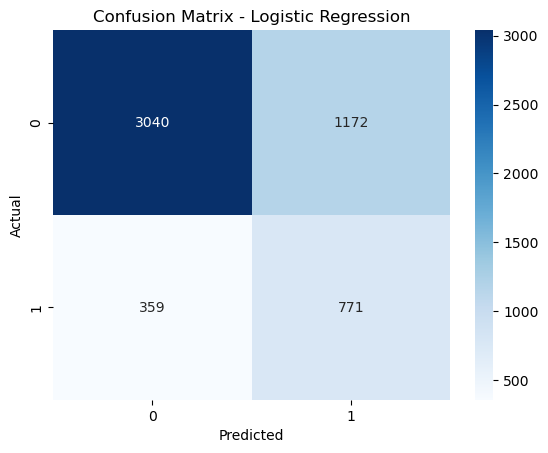

In [28]:

# Train Logistic Regression
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


True Negatives (TN) -Top-left: 3040.These are the instances where the model correctly predicted people as not taking the vaccine (class 0), and they actually did not

False Positives (FP) -Top-right: 1172.These are the instances where the model incorrectly predicted people as having taken the vaccine (class 1), but they did not.

False Negatives (FN) -Bottom-left: 359.These are the instances where the model incorrectly predicted people as not taking the vaccine (class 0), but they actually did.

True Positives (TP) -Bottom-right: 771.These are the instances where the model correctly predicted people as having taken the vaccine (class 1)


Class 1(Positive Class0:

Precision = 0.40:Out of all the instances predicted as class 1, only 40% were correct. This suggests many false positives for class 1.

Recall = 0.68:The model correctly identified 68% of all actual class 1 instances.

F1-Score = 0.50:The F1-score is relatively low, showing that the model struggles with balancing precision and recall for class 1

Class 0 (Negative Class):

Precision = 0.89:Out of all the instances predicted as class 0, 89% were correct.

Recall = 0.72:The model correctly identified 72% of all actual class 0 instances.

F1-Score = 0.80:This indicates a strong balance between precision and recall for class 0.


### Hyperparameter Tuning with Logistic Regression

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.810718464778844
Tuned Logistic Regression Accuracy: 0.8113066267315612
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      4212
           1       0.50      0.48      0.49      1130

    accuracy                           0.79      5342
   macro avg       0.68      0.67      0.68      5342
weighted avg       0.78      0.79      0.79      5342



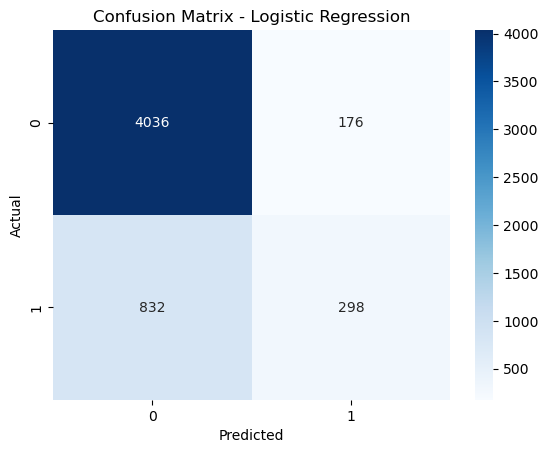

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithms
}

# Create the model
logistic_model_tuned = LogisticRegression(random_state=42)

# Perform Grid Search
grid_search_logistic = GridSearchCV(logistic_model_tuned, param_grid, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train_scaled, y_train)

# Best parameters and performance
print("Best Parameters for Logistic Regression:", grid_search_logistic.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_logistic.best_score_)

# Predict and evaluate
y_pred_tuned = grid_search_logistic.best_estimator_.predict(X_test_scaled)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


#visualize
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

True Negatives (TN) -Top-left: 4036.These are the instances where the model correctly predicted people as not taking the vaccine (class 0), and they actually did not

False Positives (FP) -Top-right: 176.These are the instances where the model incorrectly predicted people as having taken the vaccine (class 1), but they did not.

False Negatives (FN) -Bottom-left: 832.These are the instances where the model incorrectly predicted people as not taking the vaccine (class 0), but they actually did..

True Positives (TP) -Bottom-right: 298.These are the instances where  the model correctly predicted people as having taken the vaccine (class 1)..

Class 0 (Did Not Take Vaccine):

Precision: Slightly decreased from 0.89 to 0.86.

Recall: Increased from 0.72 to 0.87, meaning the model is now better at correctly identifying those who didn’t take the vaccine.

F1-Score: Improved from 0.80 to 0.87, showing a better balance between precision and recall.

Class 1 (Took Vaccine):

Precision: Improved from 0.40 to 0.50, meaning fewer false positives for this class.

Recall: Decreased from 0.68 to 0.48, meaning the model misses more people who actually took the vaccine.

F1-Score: Slightly decreased from 0.50 to 0.49.

Overall Accuracy:

Increased from 71% to 79%, showing overall improvement in the model's performance.
Macro Average (Equal Weight for Both Classes):

Precision: Improved from 0.65 to 0.68.
Recall: Dropped slightly from 0.70 to 0.67.
F1-Score: Improved from 0.65 to 0.68.

Precision, Recall, and F1-Score: All increased from approximately 0.74 to 0.79, showing that overall the model is better.

The accuracy improved significantly, suggesting better overall predictions.
The model became better at identifying people who didn’t take the vaccine (Class 0), with higher recall and F1-score for this class.


###  Simple Decision Tree

Decision Tree Performance:
Accuracy: 0.7643204792212654
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      4212
           1       0.42      0.30      0.35      1130

    accuracy                           0.76      5342
   macro avg       0.62      0.59      0.60      5342
weighted avg       0.74      0.76      0.75      5342



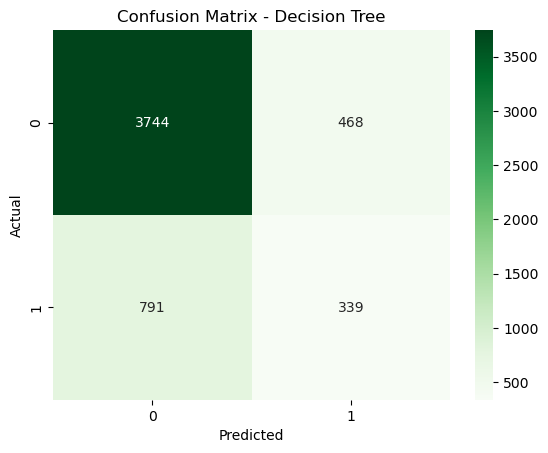

In [34]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


True Negatives (3744):The model correctly predicted 3744 people as not taking the vaccine (class 0), and they actually did not.

False Positives (468):The model incorrectly predicted 468 people as having taken the vaccine (class 1), but they did not.

False Negatives (791):The model incorrectly predicted 791 people as not taking the vaccine (class 0), but they actually did.

True Positives (339):The model correctly predicted 339 people as having taken the vaccine (class 1).

class 0 (Did Not Take Vaccine):

Precision (0.83):When the model predicts someone did not take the vaccine, it is correct 83% of the time.This means relatively few false positives for this class.

Recall (0.89):Out of all the people who actually did not take the vaccine, the model correctly identifies 89% of them.The model is good at catching most cases in this class.

F1-Score (0.86):The F1-score balances precision and recall, and here it shows strong performance for class 0.

Class 1 (Took Vaccine):
Precision (0.42):When the model predicts someone took the vaccine, it is only correct 42% of the time.This indicates a high number of false positives for class 1.

Recall (0.30):Out of all the people who actually took the vaccine, the model correctly identifies only 30% of them.The model struggles to identify individuals in this class.

F1-Score (0.35):The F1-score is low, reflecting the poor balance of precision and recall for class 1.

The model performs well in predicting people who did not take the vaccine (class 0).
It struggles significantly in identifying people who took the vaccine (class 1), as shown by the low precision and recall.


Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8057570793353616
Tuned Decision Tree Accuracy: 0.8088730812429802
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4212
           1       0.59      0.33      0.42      1130

    accuracy                           0.81      5342
   macro avg       0.71      0.63      0.65      5342
weighted avg       0.79      0.81      0.79      5342



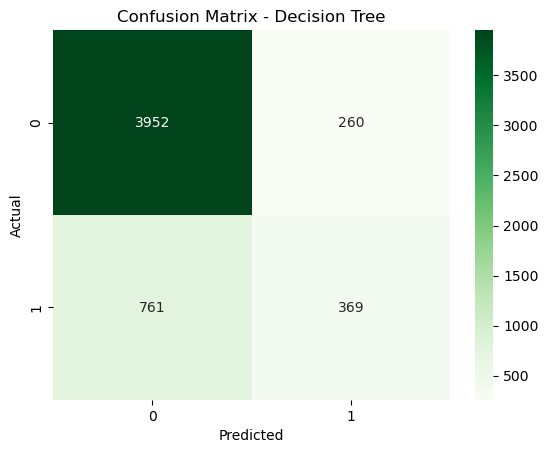

In [36]:
# Define the parameter grid
param_grid_tree = {
    'max_depth': [3, 5, 10, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

# Create the model
tree_model_tuned = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search_tree = GridSearchCV(tree_model_tuned, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train_scaled, y_train)

# Best parameters and performance
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_tree.best_score_)



# Predict and evaluate
y_pred_tree_tuned = grid_search_tree.best_estimator_.predict(X_test_scaled)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tree_tuned))


# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tree_tuned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()





Simple Decision Tree Model: Accuracy = 76%, and struggled with class 1 (low recall and precision).

Tuned Model: Accuracy = 81%, showing improvement across both classes, though class 1 still has low recall.

Class 0 (Did Not Take Vaccine):

Simple Decision Tree Model: High precision (83%) and recall (89%).

Tuned Model: Slightly better precision (84%) and recall (94%).

Class 1 (Took Vaccine):

Simple Decision Tree Model: Low precision (42%) and recall (30%).

Tuned Model: Precision has improved significantly to 59%, but recall remains at 33%, which still shows that the model is missing many true cases of class 1.

Accuracy:

The tuned model performs better overall with 81% accuracy compared to the earlier model’s 76%.

## Evaluation
The model predicts the likelihood of vaccine uptake based on various factors such as age, gender, health status, and prior vaccine perceptions. The most important features influencing vaccine uptake include health-related factors (such as chronic conditions) and personal beliefs about vaccine effectiveness. While the model is able to predict the target with reasonable accuracy, it is more effective for certain groups (e.g., those with strong health concerns) and less reliable for others (e.g., those with vaccine hesitancy). To improve predictions and outcomes, the business could focus on addressing concerns related to vaccine effectiveness and targeting high-risk groups more effectively.

The models  built, including Logistic Regression and Decision Tree, have shown decent performance with an accuracy of around 81%. While there is room for improvement, particularly in predicting certain groups who are less likely to take the vaccine, the current results provide valuable insights. To further refine the models, we could enhance feature engineering, adjust hyperparameters, or explore advanced methods like ensemble models. However, the model’s performance is sufficient to move forward with deployment. The insights gathered so far can be used to guide strategies aimed at improving vaccine uptake, making it ready for practical use.

## Recommendations

The model’s predictions are useful for targeting specific groups to increase vaccine uptake, efficiently allocating resources, and designing personalized campaigns. However, it may not be useful in situations where the data is incomplete or unrepresentative of certain populations, or if external factors change drastically. To improve results, the business could enhance data quality, focus on specific demographics, and update the model regularly with new data. By adjusting input variables, such as adding features related to health behavior or socioeconomic status, the model can better predict vaccine uptake and guide more effective interventions.
